In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from scipy.stats import randint

In [20]:
data = pd.read_csv('/Users/alihussein/Downloads/creditcard.csv')

In [ ]:
data.head()


In [7]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
frauds = data[data["Class"]==1]
len(data.index)/(len(data.index) + len(frauds.index))

0.9982754934297001

In [9]:
len(data.index)/(len(data.index) + len(frauds.index))

0.9982754934297001

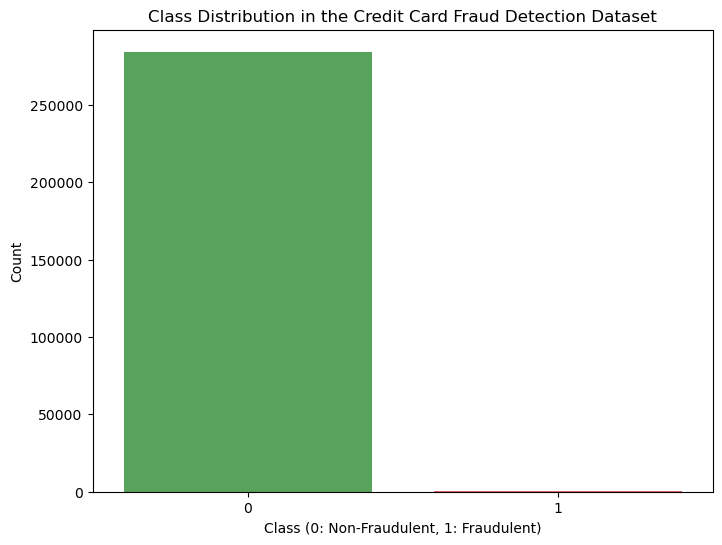

In [10]:
# Plot the distribution of the 'Class' column
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=data, palette=['#4CAF50', '#FF5252'])
plt.title('Class Distribution in the Credit Card Fraud Detection Dataset')
plt.xlabel('Class (0: Non-Fraudulent, 1: Fraudulent)')
plt.ylabel('Count')
plt.show()

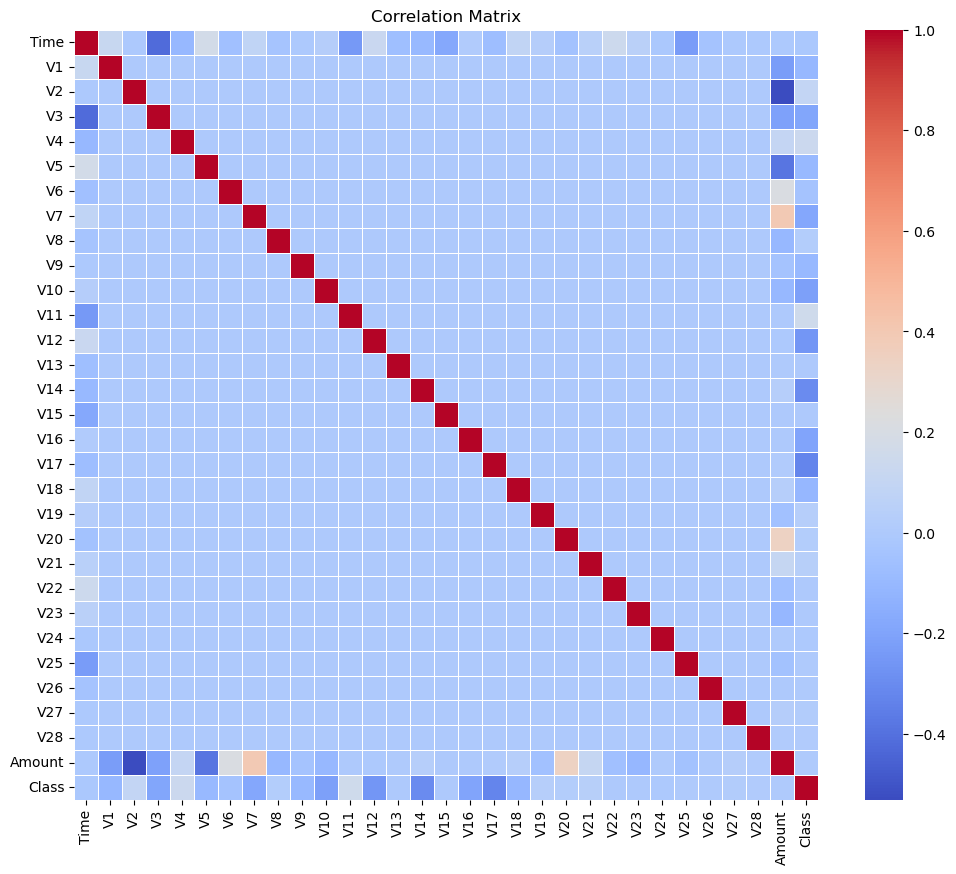

In [11]:
plt.figure(figsize=(12, 10))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


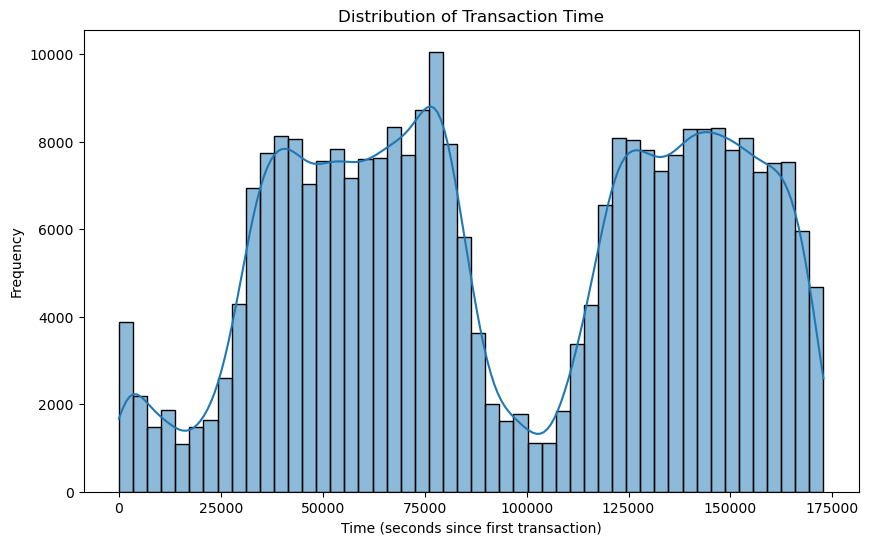

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Time'], bins=50, kde=True)
plt.title('Distribution of Transaction Time')
plt.xlabel('Time (seconds since first transaction)')
plt.ylabel('Frequency')
plt.show()


# Data Preprocessing

In [13]:
# Scaling the 'Amount' column
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))

# Separate features and target variable
X = data.drop(columns=['Class'])
y = data['Class']

# Balancing the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Original dataset shape:", y.value_counts())
print("Resampled dataset shape:", y_resampled.value_counts())

Original dataset shape: 0    284315
1       492
Name: Class, dtype: int64
Resampled dataset shape: 0    284315
1    284315
Name: Class, dtype: int64


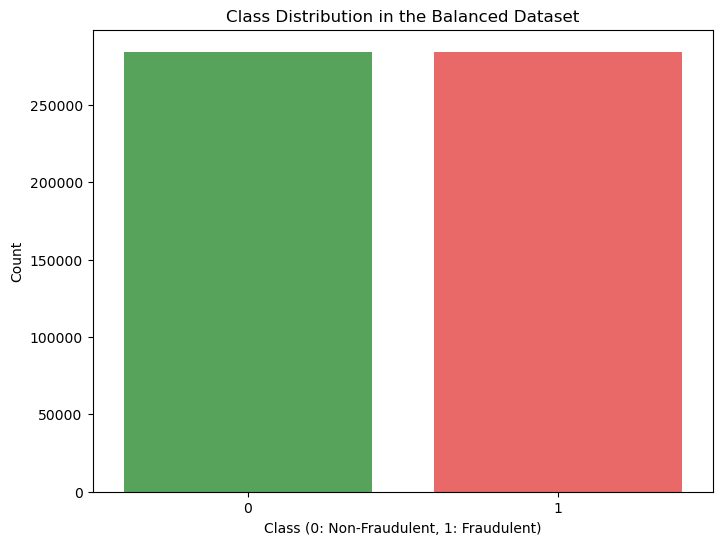

In [14]:
# Plot the distribution of the balanced dataset
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled, palette=['#4CAF50', '#FF5252'])
plt.title('Class Distribution in the Balanced Dataset')
plt.xlabel('Class (0: Non-Fraudulent, 1: Fraudulent)')
plt.ylabel('Count')
plt.show()

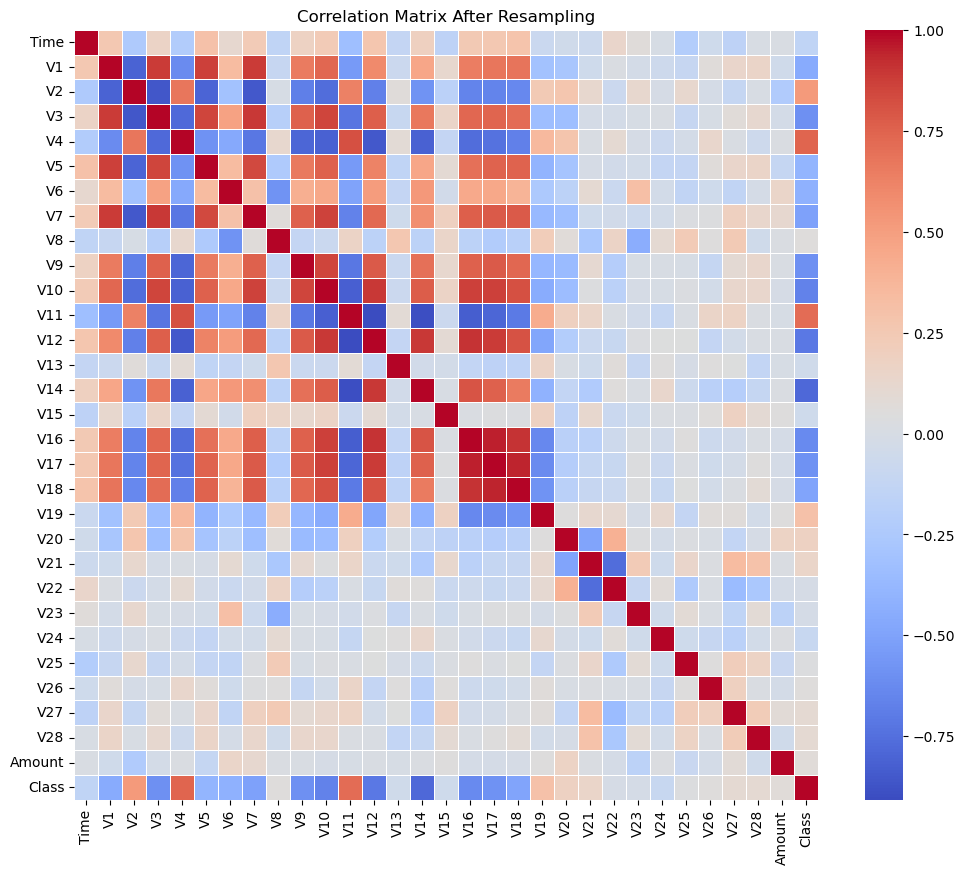

In [15]:
resampled_data = pd.DataFrame(X_resampled, columns=X.columns)
resampled_data['Class'] = y_resampled
corr_matrix_resampled = resampled_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_resampled, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix After Resampling')
plt.show()

V2, V4, V11, V19 ARE POSITIVELY CORRELATED WIT HE THE FRAUD TRANSACTIONS. V17, V14, V12 and V10 ARE NEGATIVELY CORRELATED WIT HE THE FRAUD TRANSACTIONS

# Check distribution of the positively correlated features

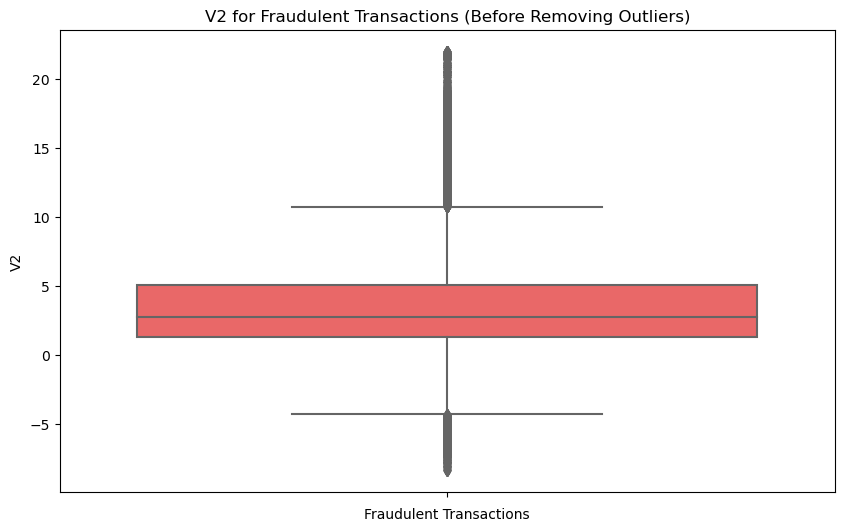

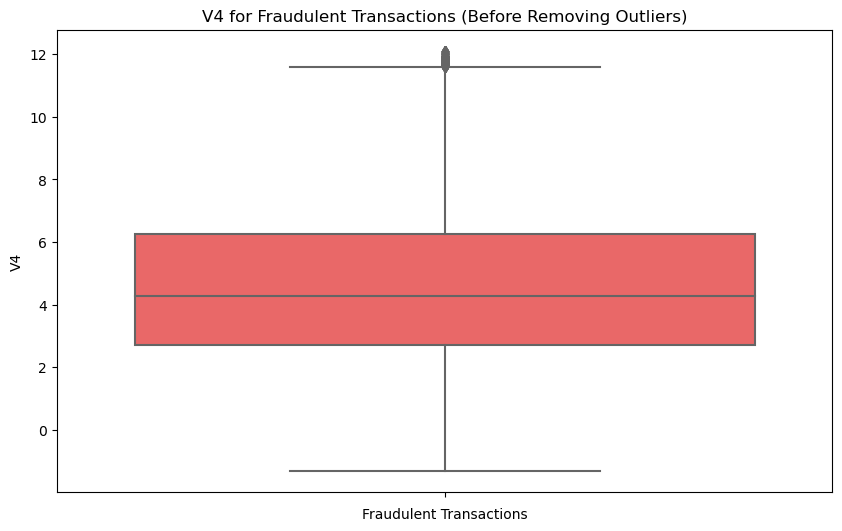

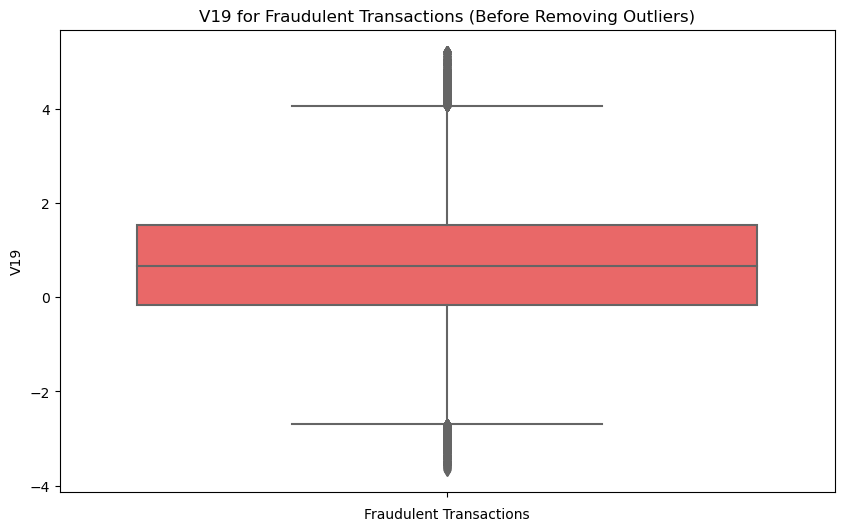

In [70]:
# Calculate the correlation matrix
data_resampled = resampled_data

features = ['V2', 'V4', 'V19']

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=data_resampled[data_resampled['Class'] == 1][feature], color='#FF5252')
    plt.title(f'{feature} for Fraudulent Transactions (Before Removing Outliers)')
    plt.xlabel('Fraudulent Transactions')
    plt.ylabel(feature)
    plt.show()

# Removing outliers using IQR

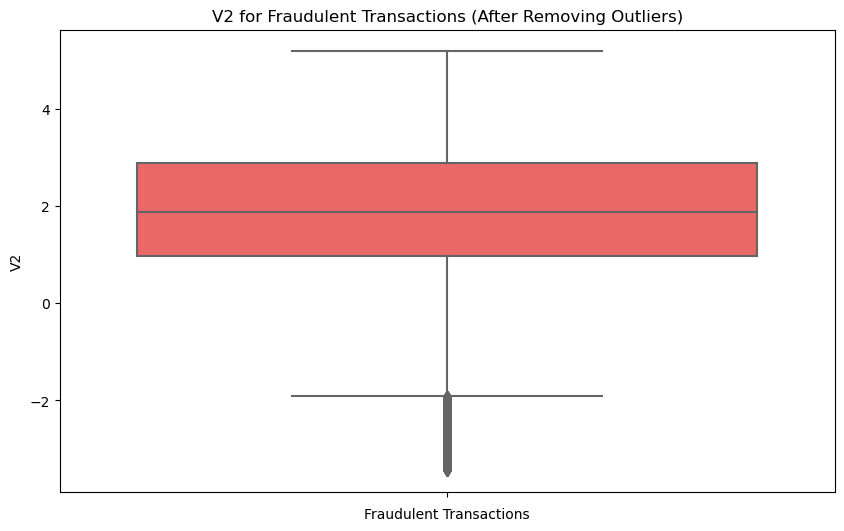

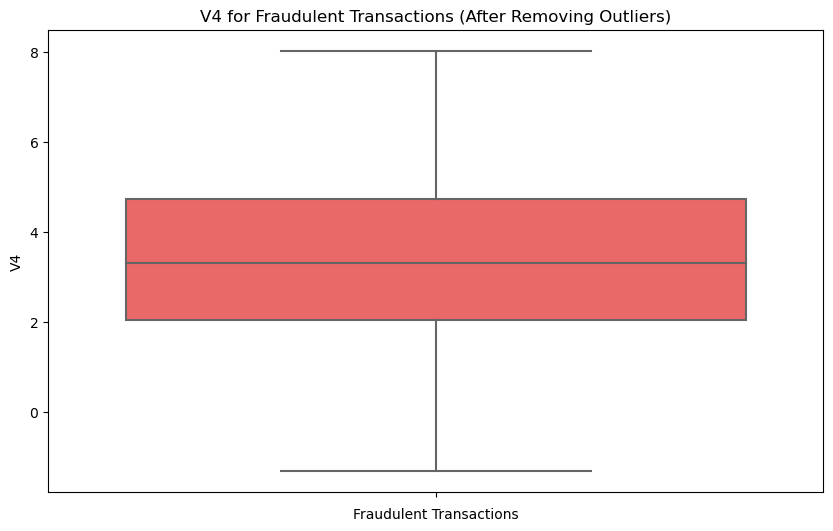

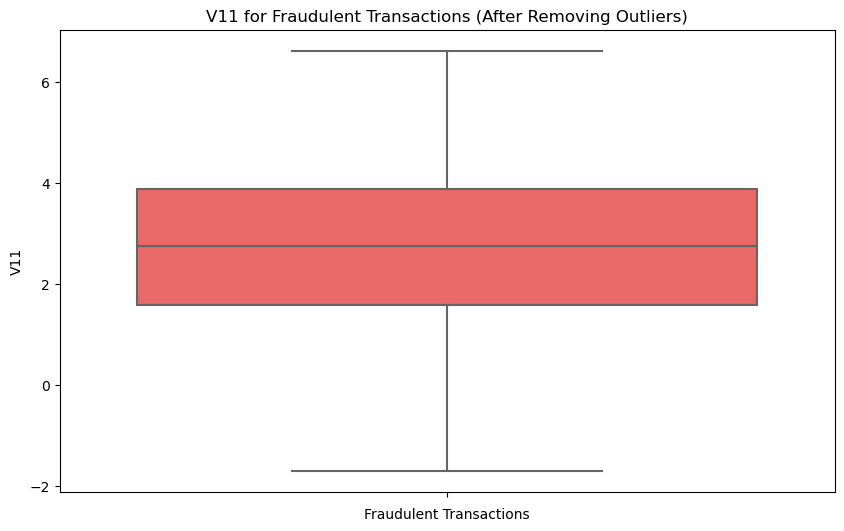

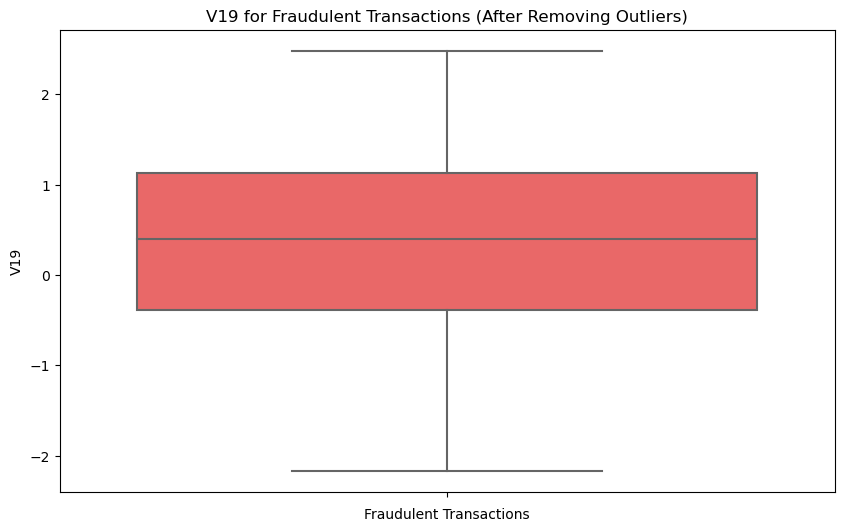

In [72]:
# Function to remove outliers using IQR (if not already applied)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered


# Remove outliers for each selected feature
for feature in ['V2', 'V4', 'V11', 'V19']:
    data_resampled = remove_outliers(data_resampled, feature)


fraudulent_data = data_resampled[data_resampled['Class'] == 1]

# Plot boxplots for the positively correlated features after removing outliers
features = ['V2', 'V4', 'V11', 'V19']

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=fraudulent_data[feature], color='#FF5252')
    plt.title(f'{feature} for Fraudulent Transactions (After Removing Outliers)')
    plt.xlabel('Fraudulent Transactions')
    plt.ylabel(feature)
    plt.show()

# Model Fitting

# A. Decision Trees

In [16]:
# Split the resampled data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Initialize and train Decision Tree model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Predictions
y_pred = decision_tree.predict(X_val)

# Evaluate Decision Tree model
accuracy = accuracy_score(y_val, y_pred) * 100
print("Accuracy:", accuracy) 

confusion_mat = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

precision=precision_score(y_val, y_pred, pos_label=1)*100
print('\n Score Precision :\n',precision )

#Recall
# Recall = TP / (TP + FN)
recall=recall_score(y_val, y_pred, pos_label=1)*100
print("\n Recall Score :\n", recall)

fscore=f1_score(y_val, y_pred, pos_label=1)*100
print("\n F1 Score :\n", fscore)

Accuracy: 100.0
Confusion Matrix:
[[85149     0]
 [    0 85440]]

 Score Precision :
 100.0

 Recall Score :
 100.0

 F1 Score :
 100.0


The results observed suggest that the model is overfitting to the balanced dataset created using SMOTE. This results in very high performance metrics on the training and validation sets but poor generalization to real-world data.

# Fitting the model on the imbalanced dataset

In [21]:
# Split the resampled data into training and validation sets
X = data.drop(columns=['Class'])
y = data['Class']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train Decision Tree model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Predictions
y_pred = decision_tree.predict(X_val)

# Evaluate Decision Tree model
accuracy = accuracy_score(y_val, y_pred) * 100
print("Accuracy:", accuracy) 

confusion_mat = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

precision=precision_score(y_val, y_pred, pos_label=1)*100
print('\n Score Precision :\n',precision )

#Recall
# Recall = TP / (TP + FN)
recall=recall_score(y_val, y_pred, pos_label=1)*100
print("\n Recall Score :\n", recall)

fscore=f1_score(y_val, y_pred, pos_label=1)*100
print("\n F1 Score :\n", fscore)

Accuracy: 99.92158515033414
Confusion Matrix:
[[85269    38]
 [   29   107]]

 Score Precision :
 73.79310344827587

 Recall Score :
 78.67647058823529

 F1 Score :
 76.15658362989323


In contrast, when we use the original imbalanced dataset, the model’s performance metrics are more realistic, indicating it is struggling to identify fraudulent transactions due to the imbalance.

# Address Overfitting using Cross-Validation

Cross-Validation AUC-ROC Scores: [0.982411   0.95400224 0.97830051 0.98697914 0.96767616]
Mean Cross-Validation AUC-ROC Score: 0.9738738108271331
Training Set Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199008
           1       0.94      0.77      0.85       356

    accuracy                           1.00    199364
   macro avg       0.97      0.89      0.92    199364
weighted avg       1.00      1.00      1.00    199364

Training Set AUC-ROC: 0.9955322641876743
Validation Set Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.88      0.77      0.82       136

    accuracy                           1.00     85443
   macro avg       0.94      0.89      0.91     85443
weighted avg       1.00      1.00      1.00     85443

Validation Set AUC-ROC: 0.9771984007243043


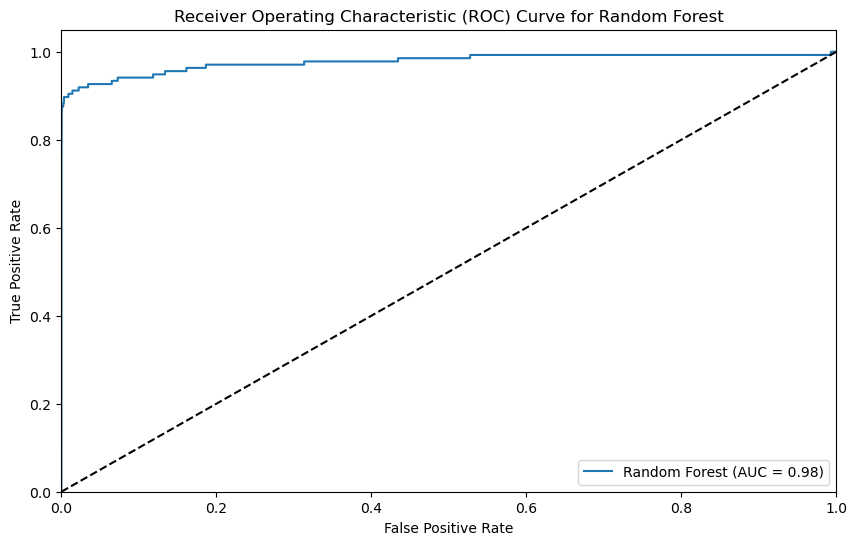

In [22]:
# Initialize and train the Random Forest model with reduced complexity
random_forest = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=10, random_state=42)

# Perform cross-validation to assess the model performance
cv_scores = cross_val_score(random_forest, X_train, y_train, cv=5, scoring='roc_auc')
print("Cross-Validation AUC-ROC Scores:", cv_scores)
print("Mean Cross-Validation AUC-ROC Score:", cv_scores.mean())

# Train the model on the training set
random_forest.fit(X_train, y_train)

# Evaluate on training set
y_train_pred = random_forest.predict(X_train)
y_train_pred_prob = random_forest.predict_proba(X_train)[:, 1]
print("Training Set Classification Report:\n", classification_report(y_train, y_train_pred))
print("Training Set AUC-ROC:", roc_auc_score(y_train, y_train_pred_prob))

# Evaluate on validation set
y_val_pred = random_forest.predict(X_val)
y_val_pred_prob = random_forest.predict_proba(X_val)[:, 1]
print("Validation Set Classification Report:\n", classification_report(y_val, y_val_pred))
print("Validation Set AUC-ROC:", roc_auc_score(y_val, y_val_pred_prob))

# Plotting ROC Curve for Random Forest model
fpr, tpr, _ = roc_curve(y_val, y_val_pred_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='Random Forest (AUC = %0.2f)' % roc_auc_score(y_val, y_val_pred_prob))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend(loc='lower right')
plt.show()